## EDA: Explanatory Data Analysis

### Essence of it:
- Python, R (library dependent: pandas, numpy, seaborn, matplotlib)
- Tableau, PowerBI (BI Tools) -> Start ups
- Free to be creative about it, back up your claim with coding results
- Intial investigation on dataset

### New ideas to bring to your attention:
- Statistical methods: (Preliminary and can be acheived by pandas)
    - Univerate analysis (1 feature only = 1 column only)
    - Bivariate analysis (2 Features only)
        - if both numerical = scatterplots
        - if both categorical = twoway table, stacked columns, heatmap
        - if it's a mix of both = box plots
    - multivariate analysis
    
- More complexed plotting:
    - Heat maps (variation with colors)
    - Contour plots 
    
- dtypes of your dataframe/ dataset
- Add/remove features
- Variable/ feature identifications:
    - Quantitative (Numerial) -> Discrete, Continous) -> histogram/ box plots
    - Qualitative (Categorical) -> Bar charts, pie charts
    
### Things you have to work on during your job as entry data scientist/ analyst:

- Collecting data (typically given unless instructed otherwise, espically for banks/finance) -> Classified info
    - If you have to collect it on your own it's typically not secured info (need to know basis)

- Missing values (Methods of resolving: imputation, interpolation, statistical methods: KNN ...) 
    Link: https://scikit-learn.org/stable/modules/impute.html (Scikit learn)
    - pandas.Dataframe.isna()
    - pandas.Dataframe.dropna()
    - pandas.Dataframe.fillna()
    - Imputation other than KNN - Univeriate analysis/ bivariate analysis
- Outliers (Methods of resolving/ point of investigation: Unsupervised ML -> for highlighting abnormality)


In [3]:
#Quick setup:
import numpy as np
import pandas as pd
temp = [np.random.uniform(2.6, 15.0) for n in range(15)]


df = pd.DataFrame({'points': temp, #Generating a list of floats 15 times
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4, 6, 8, 8, 9, 3, 2, 6],
                   'rebounds': [11, 8, 8, 6, 6, 5, 9, 12, 6, 6, 7, 8, 7, 9, 15]})

print(df.head())

## Univerate analysis:
df["points"].median() #.mean(), .std()

df.assists.value_counts() #You can turn hyperparameters: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html



      points  assists  rebounds
0  13.782630        5        11
1  11.930120        7         8
2   5.797612        7         8
3   6.103394        9         6
4  12.214719       12         6


9     4
7     2
6     2
8     2
5     1
12    1
4     1
3     1
2     1
Name: assists, dtype: int64

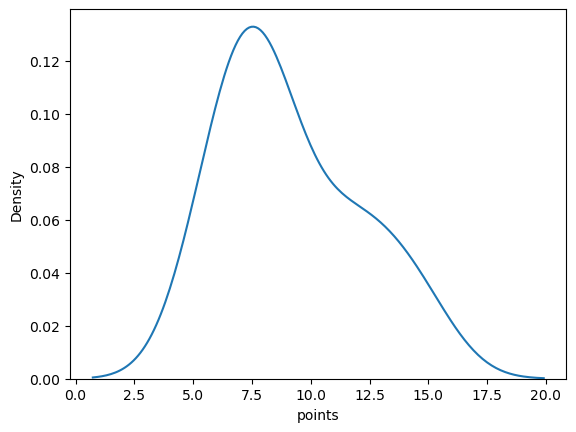

In [4]:
## Univerate analysis continued:
import matplotlib.pyplot as plt

#Box plots
#df.boxplot(column=['rebounds'], grid=False, color='black') #Doesn't seem to be working with a list of ints

#Histogram:
# df.hist(column='rebounds', grid=False, edgecolor='black')
# plt.show() #Use this when sometime things get buggy

#Density curves:
import seaborn as sns
sns.kdeplot(df['points']) #KDE = kernal density function 
plt.show()

<AxesSubplot:xlabel='rebounds', ylabel='assists'>

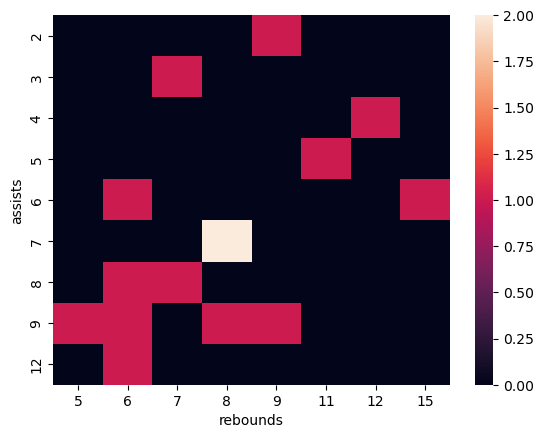

In [5]:
#Bi-variate analysis: #legend
import seaborn as sns
import pandas as pd
sns.heatmap (pd.crosstab(df.assists, df.rebounds)) #Crosstab = frequency table #Work best with categotical vars/ discrete vars

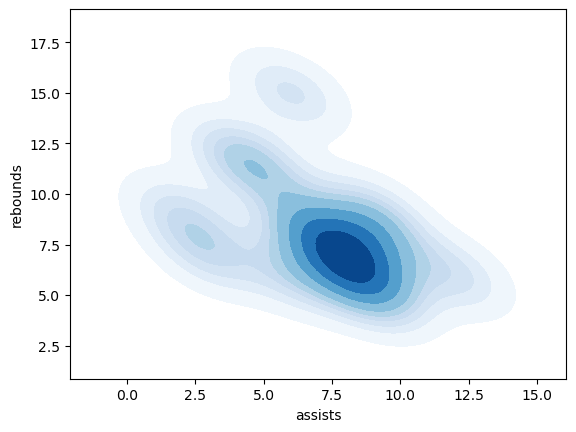

In [11]:
#Bi-variate analysis - Contour plots:
sns.kdeplot(x=df.assists, y=df.rebounds, cmap="Blues", shade=True, bw_adjust=0.8) # cmp = color map
plt.show()


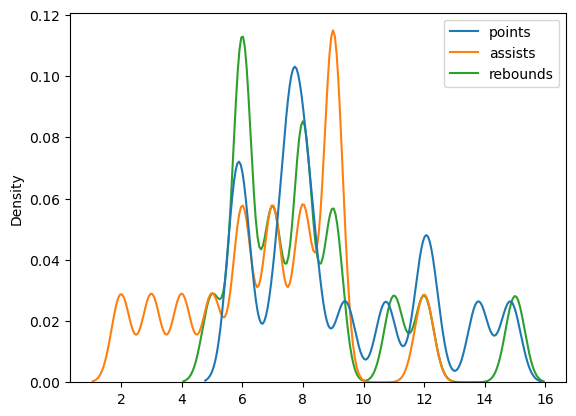

In [13]:
## Multivariate analysis:

import seaborn as sns
sns.kdeplot(data = df, bw_adjust=0.2, shade = False) #KDE = kernal density function  #Can enable shade to be true/false 
plt.show()
#bw_adjust = smoothing bandwidth (backend is scipy - gaussian estimation - normal) Higher the number the smoother vvvvvvvvvvvvvvvvvvv

# Contour visualization: more on kde 
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html

## ML Basics 
- Math, calculus
- One of skills must have for data scientist

- Data scientist uses ML frameworks to build their models -> prediction -> summarize
- Frameworks/ tool/ interface/ library:Keras (runs on top of Tensorflow) by Google engineer, Tensorflow (backend), Pytorch (by Meta)

Tensorflow: https://github.com/tensorflow/tensorflow
Keras: https://github.com/keras-team/keras
Pytorch: (Framework) : https://github.com/pytorch/pytorch



## How are we using ML in our daily lives:
- Targeted ads 
- Twitter score metrics 
- Meta charbots 
- CharGPT - openAI (https://openai.com/blog/chatgpt/)



## Types of ML:
- Supervised ML
    - Regression (Linear, cublic, log,...)
    - Classification
    - SVM
    - KNN 
    - Decision trees
    - Random forest
- Unsupervised ML
    - iforest
    - Clustering
    - K-means
    - Dim reduction (PCL)
    - Feature extraction

## Short run-through for data impuation methods: KNN


In [8]:
## KNN Imputation - Gaussian method 

from sklearn.impute import KNNImputer #K-nearest neighbor 

Before_imputation = {'Maths':[80, 90, np.nan, 95], 
        'Chemistry': [60, 65, 56, np.nan], 
        'Physics':[np.nan, 57, 80, 78],
       'Biology' : [78,83,67,np.nan]}


Before_imputation = pd.DataFrame(Before_imputation) #Coerced values from int to float
print("pre-imputation: \n ", Before_imputation, end = "\n\n")


# Documentaiton: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(Before_imputation)
print("post-imputation: ")


pd.DataFrame(After_imputation, columns=list(Before_imputation.columns)) #Quick way of combining column names from before -> after


pre-imputation: 
     Maths  Chemistry  Physics  Biology
0   80.0       60.0      NaN     78.0
1   90.0       65.0     57.0     83.0
2    NaN       56.0     80.0     67.0
3   95.0        NaN     78.0      NaN

post-imputation: 


,Maths,Chemistry,Physics,Biology
0,80.0,60.0,68.5,78.0
1,90.0,65.0,57.0,83.0
2,87.5,56.0,80.0,67.0
3,95.0,58.0,78.0,72.5


## Short run-through for data impuation methods: Simple imputer -> mean()


In [9]:
# Another imputation method: - Simple imputer 
from sklearn.impute import SimpleImputer
import numpy as np

print(pd.DataFrame(Before_imputation).head())

impNumeric = SimpleImputer(missing_values=np.nan, strategy='mean')
#impCategorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #Happens only with categorical values

solution = impNumeric.fit(Before_imputation).transform(Before_imputation)
pd.DataFrame(solution, columns=list(Before_imputation.columns)).astype(int) 




   Maths  Chemistry  Physics  Biology
0   80.0       60.0      NaN     78.0
1   90.0       65.0     57.0     83.0
2    NaN       56.0     80.0     67.0
3   95.0        NaN     78.0      NaN


,Maths,Chemistry,Physics,Biology
0,80,60,71,78
1,90,65,57,83
2,88,56,80,67
3,95,60,78,76
